<a href="https://colab.research.google.com/github/LeandroR2/neuralRedClassify/blob/main/neuralRedCalssify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

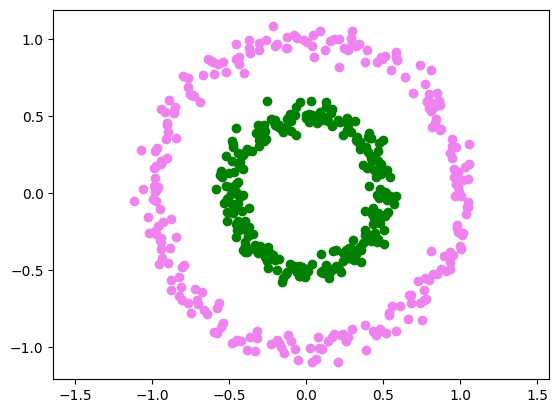

In [ ]:
# Crear el Datasets

n = 500
p = 2

X, Y = make_circles(n_samples= n, factor= 0.5, noise= 0.05)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c= "violet")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c= "green")
plt.axis("equal")
plt.show()


In [ ]:
# Clase de la capa de la red

class neural_layer():
    def __init__(self, n_conn, n_neu, act_f):
      self.act_f = act_f
      self.b = np.random.rand(1, n_neu)      * 2 - 1
      self.W = np.random.rand(n_conn, n_neu) * 2 - 1

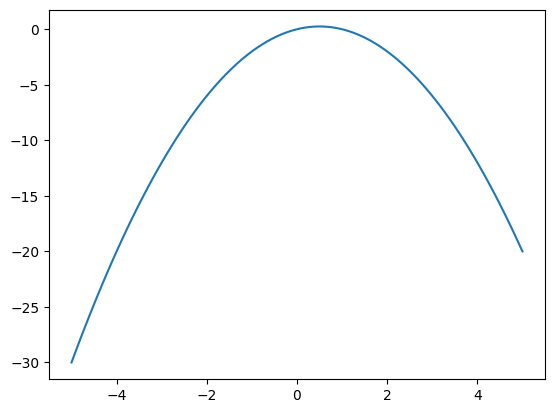

In [ ]:
# Funciones de activación

sigm = (lambda x: 1/(1 + np.e ** (-x)),
        lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

In [ ]:
# Creando capas de la red

def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

In [ ]:
topology = [p, 4, 8, 16, 8, 4, 1]

neural_net = create_nn(topology, sigm)

l2_loss = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_loss, lr=0.5):

  out = [None, X]
  # forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z, a))

  print(l2_loss[0](out[-1][1], Y))

train(neural_net, X, Y, l2_loss, 0.5)

0.3888015242559471
